# Movie Business Analysis

**Author:** Paul Waweru Mbugua
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft, a widely renowned company has been following the movie and film industry, and has been hoping to invest in the industry. Therefore, Microsoft has decided to create a new movie studio. This project aims at exploring the types of films produced in the industry, and their respective perfromance in the box office. An analysis of this performance will provide Microsoft with insights, which will enable them decide on the type of films to create.

***
Therefore, it is critical to explore how other studios' domestics and foreign grosses to gauge the gross amounts Microsoft will likely realize after opening its studios. Also, the highest grossing studios are likely to be Microsoft's main competitors, thus analyzing the type of films they produce can provide a picture of the type of films Microsoft should produce, and the type of films to avoid.

Moreover, analyzing the film grosses over the years can enable Microsoft understand the type of films that are likely to achieve higher sales. 

***
Therefore, there are several questions to consider:
* What are the lowest and highest grossing films over the years?
* What are the highest grossing studios over the years?
* what are the highest grossing genres over the years?
* What are the lowest grossing genres over the years?
* What genres do the highest grossing studios produce over the years?

***

## Data Understanding

This project utilized data from Box Office Mojo and IMDB
***

Box Office Mojo, powered by IMDbPro provides the box office receipts by period and area. 

IMDB contains a searchable database of movies, TV, entertainment programs, and their cast and crew members. They provide box office data, for example, the average rating, run time minutes, language, writers, and other information.  

***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Loading the Box Office Mojo dataset
bom = pd.read_csv('bom.movie_gross.csv')
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Connecting to the im database
conn = sqlite3.connect('im.db')

In [4]:
#Viewing all columns from the movie_basics table in the im database

basics = '''
SELECT *
FROM movie_basics
;
'''
movie_basics = pd.read_sql(basics, conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#Viweing all columns from the movie_ratings table in the im database

ratings = '''
SELECT *
FROM movie_ratings
;
'''
movie_ratings = pd.read_sql(ratings, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Data Preparation

***
The data preparation process will involve:
* Checking the null values and dropping them
* Checking duplicate values
* Checking for inconsistencies in the data
* Checking for anomalies
***

### Preparing bom.movie_gross.csv

#### Checking for Nulls

In [6]:
# Checking Nulls
bom.isnull().values.any()

True

In [7]:
# Checking the sum of the Nulls
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
# What is the percentage of null values?
total_nulls = bom.isnull().sum()  #sum of the null values
total_values = bom.shape[0]       #total number of values including the nulls

percentage_of_null = (total_nulls / total_values) * 100
print(percentage_of_null)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


The above shows that the foreign_gross column contains a significant percentage of null values. However, we will need this data for our analysis, thus we will not drop this column. 
***
The rest of the columns contain a small percentage of null values, hence we will drop the null values.
***

In [9]:
# Dropping the null values
bom = bom.dropna()
bom.shape   

(2007, 5)

In [10]:
# What is the sum of the null values?
bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### Checking for Duplicates

In [11]:
bom.duplicated().sum()

0

There are no dublicates

#### Checking for Inconsistencies in the Data

In [12]:
bom.describe(include='all')

,title,studio,domestic_gross,foreign_gross,year
count,2007,2007,2.007000e+03,2007,2007.000000
unique,2007,172,NaN,1193,NaN
top,Alpha and Omega,Uni.,NaN,1200000,NaN
freq,1,144,NaN,23,NaN
mean,NaN,NaN,4.701984e+07,NaN,2013.506228
std,NaN,NaN,8.162689e+07,NaN,2.597997
min,NaN,NaN,4.000000e+02,NaN,2010.000000
25%,NaN,NaN,6.700000e+05,NaN,2011.000000
50%,NaN,NaN,1.670000e+07,NaN,2013.000000
75%,NaN,NaN,5.605000e+07,NaN,2016.000000


In [13]:
# The .describe method does not work for foreign_gross column
bom.dtypes #checking the data types

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [14]:
#We have to convert foreign_gross from object into int64 for .describe to work
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [15]:
bom.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.002000e+03,2007.000000
mean,4.701984e+07,7.597967e+07,2013.506228
std,8.162689e+07,1.383001e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,4.000000e+06,2011.000000
50%,1.670000e+07,1.960000e+07,2013.000000
75%,5.605000e+07,7.645000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


There are no issues with our data

#### Checking for Anomalies

In [16]:
bom.title.value_counts()

Alpha and Omega                1
Glee The 3D Concert Movie      1
The Grandmaster                1
Before I Go To Sleep           1
Beloved (2012)                 1
                              ..
Den of Thieves                 1
Keeping Up with the Joneses    1
The Warrior's Way              1
Ouija: Origin of Evil          1
Venus in Fur                   1
Name: title, Length: 2007, dtype: int64

In [17]:
bom.studio.value_counts()

Uni.      144
Fox       134
WB        130
Sony      105
BV        104
         ... 
PalUni      1
Rog.        1
U/P         1
AR          1
ITL         1
Name: studio, Length: 172, dtype: int64

#### Check the data types again

In [18]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


We are satisfied with our dataframe. we can proceed to check other dataframes

### Preparing movie_basics dataframe

#### Checking Nulls

In [19]:
movie_basics.isnull().any()

movie_id           False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

In [20]:
# calculating the percentage of null values
movie_basics_null_percentage = (movie_basics.isnull().sum() / movie_basics.shape[0]) *100
print(movie_basics_null_percentage)

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64


In [21]:
# There is a small percentage of null values, thus we drop them
movie_basics = movie_basics.dropna()
movie_basics.shape

(112232, 6)

In [59]:
movie_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

#### Checking Duplicates

In [22]:
movie_basics.duplicated().sum()

0

#### Checking for data inconsistency 

In [23]:
movie_basics.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


There are outliers in data, as the min runtime in minutes is 1, while the maximum is 51420.

C:\Users\Waweru\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime_minutes'>

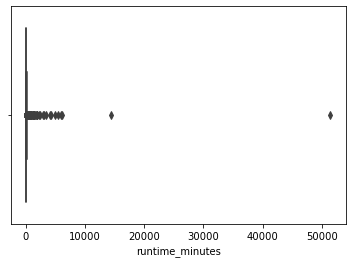

In [24]:
# Checking for outliers using a boxplot
sns.boxplot(movie_basics['runtime_minutes'])

Clearly, there are some outliers in our data

In [25]:
# calculating the lower bound and the upper bound 
q1 = np.percentile(movie_basics['runtime_minutes'], 25) #Q1
q3 = np.percentile(movie_basics['runtime_minutes'], 75) #Q3
IQR = q3 - q1 #the interquantile range

upper = q3+1.5*IQR  #upper bound
lower = q1-1.5*IQR  #lower bound

print('Lower Bound:', lower, 'minutes')
print('Upper Bound:', upper, 'minutes')

Lower Bound: 26.5 minutes
Upper Bound: 142.5 minutes


In [26]:
# Removing the outliers 
movie_basics = movie_basics[(movie_basics.runtime_minutes<upper) &
                           (movie_basics.runtime_minutes>lower)]

print('The new shape is:', movie_basics.shape)

The new shape is: (105507, 6)


In [27]:
movie_basics.describe()

,start_year,runtime_minutes
count,105507.000000,105507.000000
mean,2014.378999,85.236714
std,2.645518,21.806845
min,2010.000000,27.000000
25%,2012.000000,72.000000
50%,2014.000000,87.000000
75%,2017.000000,98.000000
max,2022.000000,142.000000


We have removed the outliers

#### Checking for other anomalies

In [28]:
movie_basics.movie_id.value_counts()

tt7606828    1
tt1961474    1
tt1876535    1
tt4700756    1
tt9139660    1
            ..
tt7945574    1
tt1852110    1
tt3487902    1
tt4471280    1
tt4153376    1
Name: movie_id, Length: 105507, dtype: int64

In [29]:
movie_basics.primary_title.value_counts()

Home                  16
Broken                15
The Return            14
Gone                  12
Homecoming            12
                      ..
A Thousand Faces       1
Sea of Light           1
Giraffraud             1
In a Small World       1
All we ever wanted     1
Name: primary_title, Length: 99444, dtype: int64

In [30]:
movie_basics.original_title.value_counts()

Broken                            14
The Return                        12
Home                              12
Hope                              10
The Gift                           9
                                  ..
False Confessions                  1
Kuppathu Raja                      1
L'accabadora                       1
What's the Matter with Gerald?     1
All we ever wanted                 1
Name: original_title, Length: 100793, dtype: int64

In [31]:
movie_basics.genres.value_counts()

Documentary                     22780
Drama                           15275
Comedy                           6258
Comedy,Drama                     3061
Horror                           2942
                                ...  
Documentary,Music,Reality-TV        1
Adventure,History,Western           1
Comedy,Documentary,War              1
Adventure,Fantasy,Music             1
Adventure,Fantasy,Musical           1
Name: genres, Length: 1023, dtype: int64

### Preparing movie_ratings dataframe

#### Checking Nulls

In [32]:
movie_ratings.isnull().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

There are no null values in our dataframe

#### Checking Duplicates

In [33]:
movie_ratings.duplicated().sum()

0

There are no dubplicates

#### Checking for data inconsistency

In [34]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The appears to be no inconsistencies in the data

#### Checking for Anomalies

In [35]:
movie_ratings.value_counts()

movie_id   averagerating  numvotes
tt9916160  6.5            11          1
tt2413182  9.2            13          1
tt2418372  5.9            866         1
tt2418384  7.0            13          1
tt2418440  6.3            4551        1
                                     ..
tt4861720  5.2            62          1
tt4861730  6.1            331         1
tt4862056  8.3            14          1
tt4862190  8.2            117         1
tt0063540  7.0            77          1
Length: 73856, dtype: int64

There are no anomalies in the movie_ratings data

## Exploratory Data Analysis 
***
In this section, we will explore the relationships between various variables

### Plots to visualize patterns in the data

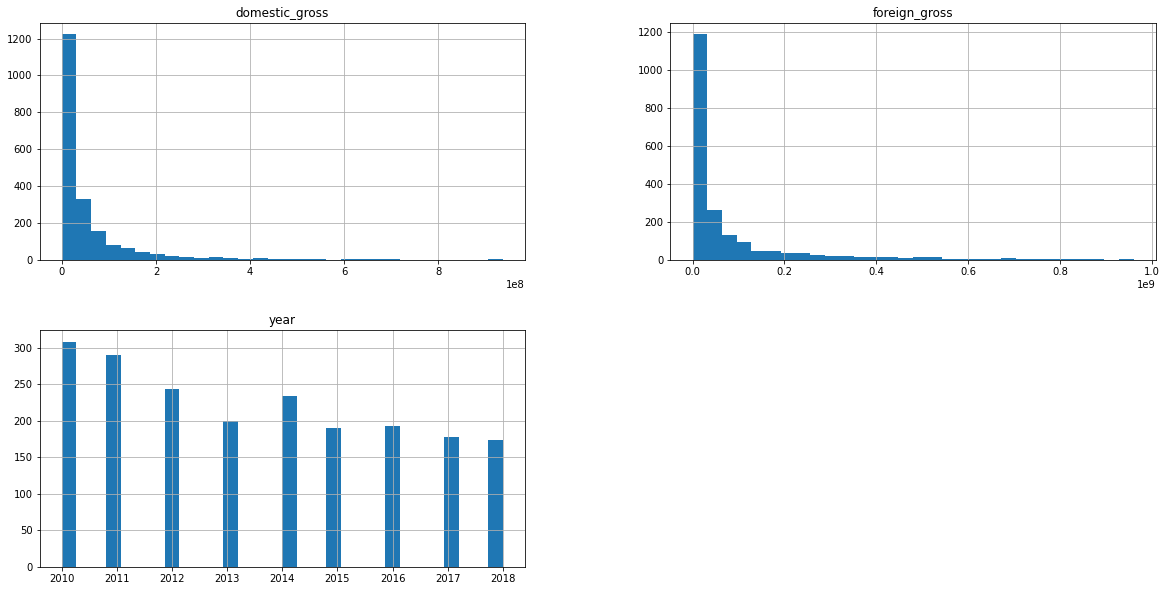

In [37]:
# Histograms for bom datafarame

bom.hist(figsize = (20,10), bins = 30)
plt.show()

Text(0.5, 1.0, 'Top 10 Studios by Movie Production')

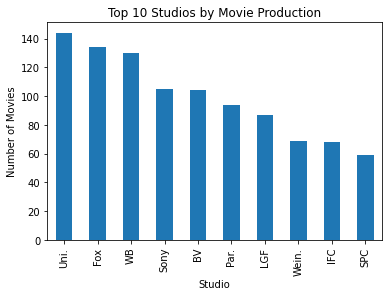

In [64]:
# Bar plot showing the studios producing most movies
studios_with_most_movies = (bom['studio'].value_counts())[:10]

studios_with_most_movies.plot(kind='bar')

plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Top 10 Studios by Movie Production')

Text(0.5, 1.0, 'Top 10 Studios by Domestic Gross')

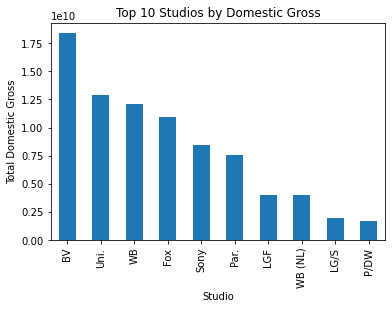

In [79]:
#Highest domestic grossing studios

studio_by_domestic_gross = bom.groupby(['studio'])['domestic_gross'].sum()
highest_grossing = studio_by_domestic_gross.sort_values(ascending=False).head(10)

highest_grossing.plot(kind='bar')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross')
plt.title('Top 10 Studios by Domestic Gross')

Text(0.5, 1.0, 'Top 10 Studios by Foreign Gross')

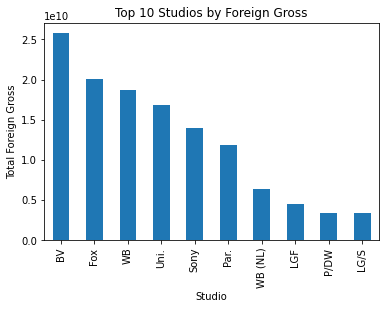

In [80]:
#Highest foreign grossing studios

studio_by_foreign_gross = bom.groupby(['studio'])['foreign_gross'].sum()
highest_foreign_grossing = studio_by_foreign_gross.sort_values(ascending=False).head(10)

highest_foreign_grossing.plot(kind='bar')
plt.xlabel('Studio')
plt.ylabel('Total Foreign Gross')
plt.title('Top 10 Studios by Foreign Gross')

Text(0.5, 1.0, 'Domestic and Foreign Grosses over the Years')

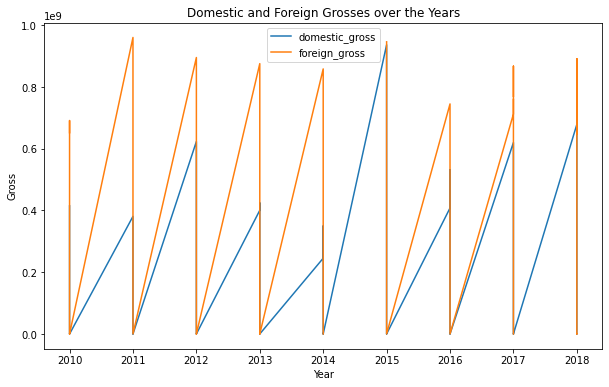

In [99]:
# Trends for domestic gross and foreign gross over the years
bom.plot(x='year', y=['domestic_gross', 'foreign_gross'], figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Domestic and Foreign Grosses over the Years')

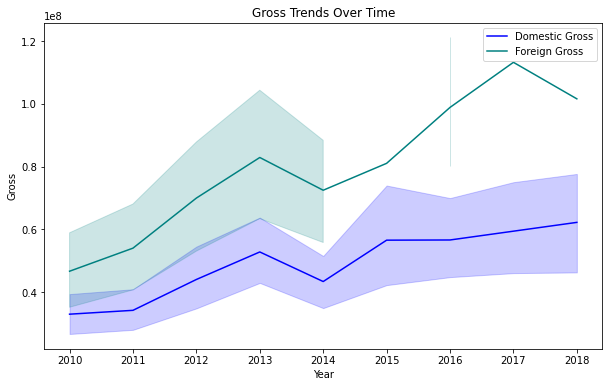

In [106]:
# Trends for domestic gross and foreign gross over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=bom, x='year', y='domestic_gross', color='blue', label='Domestic Gross')
sns.lineplot(data=bom, x='year', y='foreign_gross', color='teal', label='Foreign Gross')

plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Gross Trends Over Time')
plt.show()

We will combine movie_basics and movie_ratings database to facilitate the analysis

In [84]:
#combining the movie_basics and movie_ratings data frames into movies dataframe

movies = movie_basics.merge(movie_ratings, on='movie_id', how='inner')
movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
3,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
4,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451


Text(0.5, 1.0, 'Top 10 Highest Rated Genres')

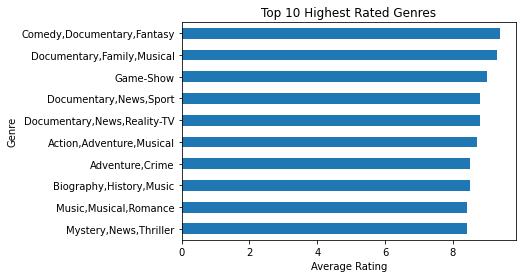

In [91]:
# Genres with the highest average ratings
genres_ratings = movies.groupby(['genres'])['averagerating'].mean()
genres_with_highest_ratings = genres_ratings.sort_values(ascending=True).tail(10)

genres_with_highest_ratings.plot(kind='barh')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Highest Rated Genres')

Text(0.5, 1.0, 'Bottom 10 Lowest Rated Genres')

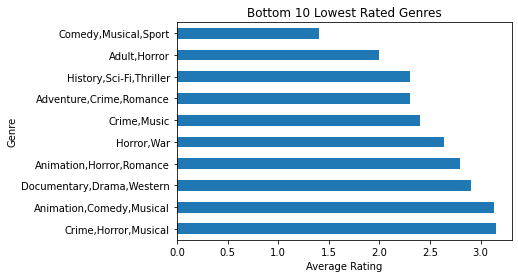

In [98]:
# Genres with the lowest average ratings
genres_ratings = movies.groupby(['genres'])['averagerating'].mean()
genres_with_lowest_ratings = genres_ratings.sort_values(ascending=False).tail(10)

genres_with_lowest_ratings.plot(kind='barh')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Bottom 10 Lowest Rated Genres')

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***